In [252]:
import numpy as np
from scipy import ndimage
import itertools
import matplotlib as mpl
import matplotlib.pyplot as plt
from utils import u_time as ut
from mpl_toolkits.basemap import Basemap
from eod import msg
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (16., 9.)
%matplotlib inline
from scipy.stats import pearsonr
from scipy.stats import gaussian_kde
from scipy.stats import ttest_ind

import scipy.optimize as so
import pickle as pkl

In [29]:
myDicts = pkl.load( open ('/users/global/cornkle/data/OBS/MSG_TRMM_temp_pcp_300px2004-2013_new.p', 'rb'))

In [30]:
dic=myDicts[0]
dicf=myDicts[1]

In [31]:
print(dic.keys())
print(dicf.keys())

dict_keys(['perc', 'lat', 'tpixel_conv', 'yr', 'area', 'tpixel_zero', 'pmax', 'pi', 'hod', 'tpixel_derived', 'tpixel_strat', 'twhole', 'tpixel', 'tpixel_nzero', 'mon', 'lon', 'pp', 't', 'p'])
dict_keys(['perc', 'lat', 'ppconv', 'yr', 'pmaxconv', 'piconv', 'tnfconv', 'tpixel_convNZ', 'hod', 'mon', 'tpixel_stratNZ', 'lon', 'tconv', 'pconv'])


In [217]:
pdev=np.array(dic['tpixel_derived'])
pix=np.array(dic['tpixel'])
pixnz=np.array(dic['tpixel_nzero'])
pixconv=np.array(dic['tpixel_conv'])
pixstrat=np.array(dic['tpixel_strat'])
pixz=np.array(dic['tpixel_zero'])
t=np.array(dic['t'])
pixstratNZ=np.array(dicf['tpixel_stratNZ'])
pixconvNZ=np.array(dicf['tpixel_convNZ'])
tw=np.array(dic['twhole'])
area=np.array(dic['area'])

In [218]:
pixconv=np.array(dic['tpixel_conv'])
pdev=pdev[pixconv>40]
pix=pix[pixconv>40]
pixnz=pixnz[pixconv>40]
pixstrat=pixstrat[pixconv>40]
pixz=pixz[pixconv>40]
t=t[pixconv>40]
pixstratNZ=pixstratNZ[pixconv>40]
pixconvNZ=pixconvNZ[pixconv>40]
tw=tw[pixconv>40]
area=area[pixconv>40]
pixconv=pixconv[pixconv>40]

In [264]:
ratio = pixconv/ pixnz#(pixstrat+pixconv)
#ratiozero = pixconvNZ / pix
ratiozero = pixconvNZ / pixnz
#ratiozero = pixstratNZ/pixstrat

In [265]:
print(pixstratNZ[1]+pixconvNZ[1])
print(pix[1])

461
6334


In [266]:
print('All derived:', pdev[0])
print('All:', pix[0])
print('No zero:', pixnz[0])
print('Convective:', pixconv[0])
print('Stratiform:', pixstrat[0])
print('Pixel zero rain:', pixz[0])
print('ConvectiveNZ:', pixconvNZ[0])
print('StratiformNZ:', pixstratNZ[0])

All derived: 2674
All: 2505
No zero: 1380
Convective: 110
Stratiform: 1439
Pixel zero rain: 1125
ConvectiveNZ: 105
StratiformNZ: 1274


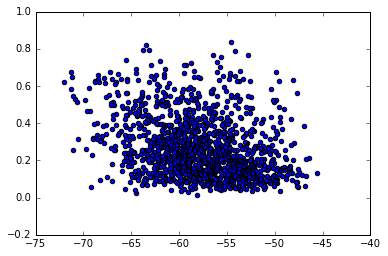

In [291]:
plt.scatter(tsort, zratiosort)

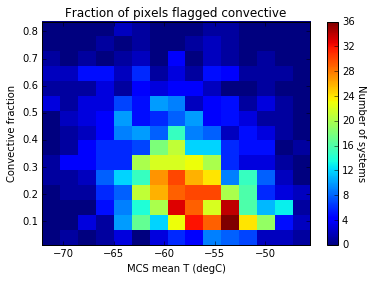

In [290]:
plt.hist2d(tsort, zratiosort, bins=15, cmap=plt.cm.jet)
cbar=plt.colorbar()
cbar.set_label('Number of systems', rotation=270, labelpad=+11)
plt.title('Fraction of pixels flagged convective')
plt.xlabel('MCS mean T (degC)')
plt.ylabel('Convective fraction')
plt.savefig('/users/global/cornkle/grpm/conv_frac.pdf')

In [289]:
tsort, ratiosort, zratiosort, csort, ssort = zip(*sorted(zip(tw, ratio, ratiozero, pixconv, pixstrat), reverse=True))

In [287]:
np.mean(zratiosort[0:500])

0.23071508243879404

In [288]:
np.mean(zratiosort[-500:-1])

0.31724573076106449

In [284]:
ttest_ind(ratiosort[0:500], ratiosort[-500:-1])

Ttest_indResult(statistic=-8.7384889441050131, pvalue=9.8543876035071185e-18)

In [254]:
ttest_ind(zratiosort[0:500], zratiosort[0:500])

Ttest_indResult(statistic=0.0, pvalue=1.0)